In [10]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import faculty.datasets as datasets
from pandas.api.types import CategoricalDtype
import matplotlib.ticker as mtick
import statsmodels.api as sm
import plotly.graph_objects as go


from pandas import Series, DataFrame
import os
from functools import reduce
vcvtype = 'nonrobust'


In [11]:
all_football_18 = pd.read_csv('/project/all_football_18.csv', index_col=0)


In [12]:
all_football_18.head()

,country_name,Final_positional_ranking,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,shotOnTargetPG,dribbleWonPG,...,keyPassShort,left_side_percent,middle_side_percent,right_side_percent,own_third_percent,middle_third_percent,opposition_third_percent,shot_left_side_percent,shot_middle_side_percent,shot_right_side_percent
0,Argentina,16,6,13.8,11,0,61.1,85.0,4.5,13.5,...,8.8,38,27,35,19,49,32,27,49,24
1,Australia,25,2,11.0,7,0,50.9,83.7,2.3,11.0,...,6.3,35,20,45,27,47,25,9,79,12
2,Belgium,3,16,15.1,11,0,52.1,86.3,5.7,13.3,...,10.6,34,26,40,27,47,26,26,56,18
3,Brazil,5,8,20.8,7,0,56.8,87.9,8.0,14.8,...,13.0,43,29,29,25,44,31,28,60,13
4,Colombia,10,6,9.8,9,1,50.2,79.9,3.3,7.8,...,5.0,33,22,45,29,48,23,7,66,27


Based on the 6 most significant/important variables we found, we decided to make a ranking table and rank the countries based on these variables. The aim is to compare the actual ranking of each country with the ranking we found to be the best according to the data. 

In [13]:
ranking_table = all_football_18[["country_name",'Final_positional_ranking',
                                 "goal", 'possession_percentage','stat-value',
                                 'passLongBallInaccurate','shortPassAccurate',
                                 'keyPassShort']]
ranking_table.head()

,country_name,Final_positional_ranking,goal,possession_percentage,stat-value,passLongBallInaccurate,shortPassAccurate,keyPassShort
0,Argentina,16,6,61.1,6.57,25.5,474.3,8.8
1,Australia,25,2,50.9,6.47,28.7,375.3,6.3
2,Belgium,3,16,52.1,7.06,21.9,420.3,10.6
3,Brazil,5,8,56.8,7.06,12.0,466.2,13.0
4,Colombia,10,6,50.2,6.76,31.5,314.8,5.0


In [14]:
cols = ["goal", 'possession_percentage','stat-value', 
        'shortPassAccurate','keyPassShort','passLongBallInaccurate']

ranking_table["Ranking_after_analysis"] = ranking_table[cols].apply(tuple,axis=1)\
             .rank(method='dense',ascending=False).astype(int)

ranking_table.sort_values("Ranking_after_analysis")


<ipython-input-14-0e61e125a163>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ranking_table["Ranking_after_analysis"] = ranking_table[cols].apply(tuple,axis=1)\


,country_name,Final_positional_ranking,goal,possession_percentage,stat-value,passLongBallInaccurate,shortPassAccurate,keyPassShort,Ranking_after_analysis
2,Belgium,3,16,52.1,7.06,21.9,420.3,10.6,1
6,Croatia,2,14,55.4,6.80,29.6,368.3,7.4,2
10,France,1,14,49.6,6.93,25.7,322.0,7.4,3
9,England,4,12,53.5,6.82,27.3,399.6,6.6,4
22,Russia,7,11,39.5,6.75,33.6,213.4,5.4,5
3,Brazil,5,8,56.8,7.06,12.0,466.2,13.0,6
27,Spain,12,7,69.2,6.71,16.5,679.0,8.5,7
31,Uruguay,6,7,47.7,6.83,28.4,315.2,6.2,8
0,Argentina,16,6,61.1,6.57,25.5,474.3,8.8,9
21,Portugal,14,6,52.9,6.70,27.3,358.5,8.8,10


In [15]:
# moving the Rank_after_analysis column to be just after the Final_positional_ranking so
# that it can be easier for the analysis
my_list = list(ranking_table)
ranking_table = ranking_table[['country_name',
 'Final_positional_ranking',
 'Ranking_after_analysis',
 'goal',
 'possession_percentage',
 'stat-value',
 'passLongBallInaccurate',
 'shortPassAccurate',
 'keyPassShort']]
ranking_table.sort_values(by=["Final_positional_ranking"], inplace = True)
ranking_table.head()


,country_name,Final_positional_ranking,Ranking_after_analysis,goal,possession_percentage,stat-value,passLongBallInaccurate,shortPassAccurate,keyPassShort
10,France,1,3,14,49.6,6.93,25.7,322.0,7.4
6,Croatia,2,2,14,55.4,6.80,29.6,368.3,7.4
2,Belgium,3,1,16,52.1,7.06,21.9,420.3,10.6
9,England,4,4,12,53.5,6.82,27.3,399.6,6.6
3,Brazil,5,6,8,56.8,7.06,12.0,466.2,13.0


Export dataset ranking_table to be able to use it in other jupyter notebooks

In [16]:
ranking_table.to_csv("ranking_table.csv")

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Position Ranking')

Text(0.5, 1.0, 'World Cup 2018 ranking')

<BarContainer object of 32 artists>

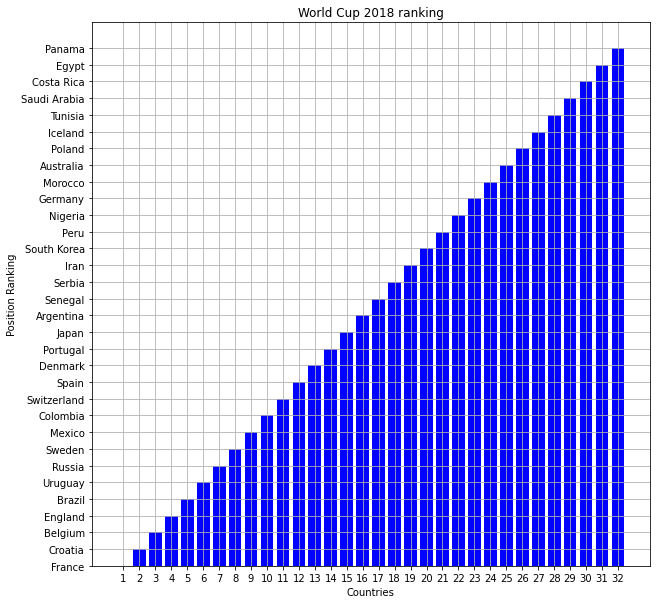

In [17]:
fig = plt.figure(figsize=(10,10))

x= ranking_table["Final_positional_ranking"]
y = ranking_table["country_name"]

_ = plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.grid(visible=True)
plt.xlabel("Countries")
plt.ylabel("Position Ranking")
plt.title("World Cup 2018 ranking")
plt.bar(x, y, color ='b', width = 0.8, align = 'center')


plt.savefig("/project/Visualisation_graphs/world_cup_ranking_comparison.png")
plt.show()



<AxesSubplot:xlabel='Countries', ylabel='Position Ranking'>

Text(0.5, 1.0, 'World Cup 2018 ranking')

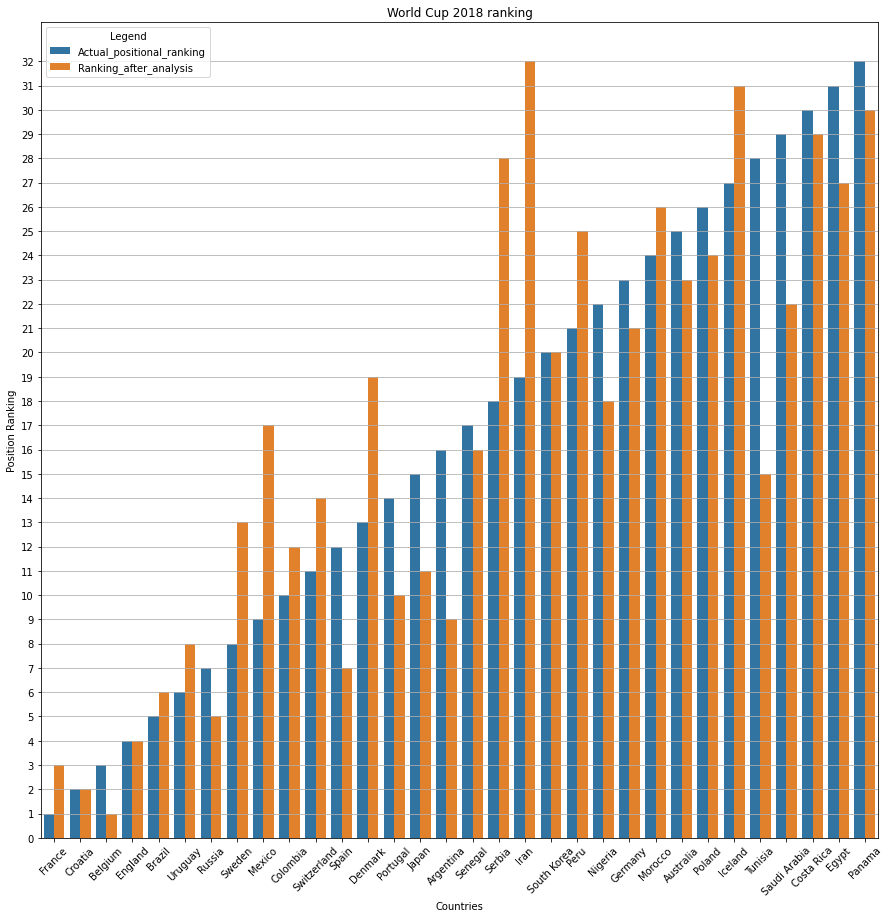

In [19]:
fig = plt.figure(figsize=(15,15))

plt.grid(visible=True)

df1 = pd.DataFrame({"Position Ranking":ranking_table["Final_positional_ranking"], "Countries":ranking_table["country_name"]})
df2 = pd.DataFrame({"Position Ranking":ranking_table["Ranking_after_analysis"], "Countries":ranking_table["country_name"]})

df1['Legend']="Actual_positional_ranking"
df2['Legend']="Ranking_after_analysis"

res=pd.concat([df1,df2])
sns.barplot(y='Position Ranking',x='Countries',data=res,hue='Legend')
_ = plt.yticks(range(len(y)+1))
_ = plt.xticks(rotation = 45)
plt.title("World Cup 2018 ranking")

plt.savefig("/project/Visualisation_graphs/world_cup_ranking_comparison.png")
plt.show()
